In [31]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [32]:
rho = 0.85
h = 0.016
m = 48
T = 1
M = 6 # cube root of number of unit cells in the L^3 volume, gives N=864 particles
L = np.cbrt((4*M**3)/rho)
sigma = 3.405 #Angstrom
epsilon = 119.8 #K
T = 2.0
sigma = 3.405 #Angstrom
epsilon = 119.8 #K
m = 48 # Be careful, m is also defined in the cython

tp = h#*

In [33]:
path_r_0 = "C:/Users/corin/CLionProjects/Computational-physics/r_total_T0_rescaling.txt"
path_v_0 = "C:/Users/corin/CLionProjects/Computational-physics/v_total_T0_rescaling.txt"

path_r_2 = r"C:\Users\corin\CLionProjects\Computational-physics\r_total_T2_rescaling.txt"
path_v_2 = r"C:\Users\corin\CLionProjects\Computational-physics\v_total_T2_rescaling.txt"

path_r_1 = r"C:\Users\corin\CLionProjects\Computational-physics\r_total_T1_rescaling.txt"
path_v_1 = r"C:\Users\corin\CLionProjects\Computational-physics\v_total_T1_rescaling.txt"


r_total = np.loadtxt(path_r_0, delimiter=",")
v_total = np.loadtxt(path_v_0, delimiter=",")

r_total_2 = np.loadtxt(path_r_2, delimiter=",")
v_total_2 = np.loadtxt(path_v_2, delimiter=",")

r_total_1 = np.loadtxt(path_r_1, delimiter=",")
v_total_1 = np.loadtxt(path_v_1, delimiter=",")

r_total_2.shape

(1295127, 3)

In [34]:
num_timesteps = 1498

r_total_cut = r_total[:864*num_timesteps - r_total.shape[0], :]
v_total_cut = v_total[:864*num_timesteps - v_total.shape[0], :]
r_total_reshaped = r_total_cut.reshape((num_timesteps, 864, 3))
v_total_reshaped = v_total_cut.reshape((num_timesteps, 864, 3))

r_total_2_cut = r_total_2[:864*num_timesteps - r_total_2.shape[0], :]
v_total_2_cut = v_total_2[:864*num_timesteps - v_total_2.shape[0], :]
r_total_2_reshaped = r_total_2_cut.reshape((num_timesteps, 864, 3))
v_total_2_reshaped = v_total_2_cut.reshape((num_timesteps, 864, 3))

r_total_1_cut = r_total_1[:864*num_timesteps - r_total_1.shape[0], :]
v_total_1_cut = v_total_1[:864*num_timesteps - v_total_1.shape[0], :]
r_total_1_reshaped = r_total_1_cut.reshape((num_timesteps, 864, 3))
v_total_1_reshaped = v_total_1_cut.reshape((num_timesteps, 864, 3))

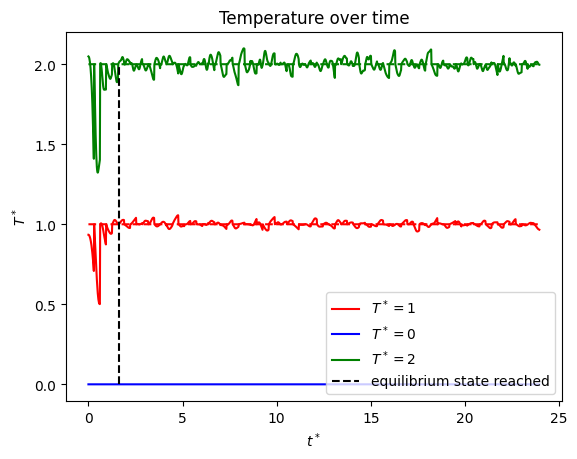

In [38]:
def Temperature(v):
    return 16*np.mean([(v_i[0]**2)+(v_i[1]**2)+(v_i[2]**2) for v_i in v])

T_total_0 = [Temperature(v_t) for v_t in v_total_reshaped]
T_total_1 = [Temperature(v_t) for v_t in v_total_1_reshaped]
T_total_2 = [Temperature(v_t) for v_t in v_total_2_reshaped]
plt.plot(np.arange(v_total_1_reshaped.shape[0])*tp, T_total_1, "r", label="$T^* = 1$")
plt.plot(np.arange(v_total_1_reshaped.shape[0])*tp, T_total_0, "b", label="$T^* = 0$")
plt.plot(np.arange(v_total_1_reshaped.shape[0])*tp, T_total_2, "g", label="$T^* = 2$")

plt.plot(np.arange(num_timesteps)*tp, np.ones(num_timesteps), "r--")
plt.plot(np.arange(num_timesteps)*tp, 2*np.ones(num_timesteps), "g--")
plt.vlines(100*tp, 0,2, color="k", linestyles="--", label = "equilibrium state reached")

plt.title("Temperature over time")
plt.xlabel("$t^*$")
plt.ylabel("$T^*$")
plt.legend(loc="lower right")

In [39]:
def mean_Temperature(list_T):
    return np.mean(list_T), np.std(list_T)

equilibrium_begin = 100
print("T=2: ",mean_Temperature(T_total_2[equilibrium_begin:]))
print("T=1: ",mean_Temperature(T_total_1[equilibrium_begin:]))
print("T=0: ",mean_Temperature(T_total_0[equilibrium_begin:]))

T=2:  (1.9986517599674112, 0.034033831801304495)
T=1:  (1.0014757796933649, 0.015273251791761299)
T=0:  (0.0, 0.0)
